In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import accuracy_score
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.optimizers import Adam

In [2]:
# Carregar os dados do arquivo Excel
file_path = r'G:\Meu Drive\MESTRADO - MLOG\Projeto EV-Explore Ambev\TESTE_MAP_MATCHING_25_04\ENERGIA_v3.xlsx'
data = pd.read_excel(file_path)

In [3]:
data

,ID_Rota,E_cinetica,E_gravit,E_atrito,E_res_ar,E_Regen_Lin,E_Regen_Exp,ENERGIA EST. (%),ENERGIA EST. REG. LIN. (%),ENERGIA EST. REG. EXP. (%),TBGREEN (%)
0,20230901_RHQ2H04,0.199537,0.098231,0.195568,0.051162,-0.040010,-0.043564,0.544498,0.504488,0.500934,0.412
1,20230902_RHS6B08,0.185326,0.111138,0.248889,0.070658,-0.043772,-0.047662,0.616011,0.572240,0.568350,0.416
2,20230902_RHS6F90,0.207013,0.219680,0.221214,0.058543,-0.045707,-0.049484,0.706450,0.660743,0.656966,0.464
3,20230902_RHT4G96,0.194500,0.101624,0.222006,0.072888,-0.043379,-0.047387,0.591018,0.547639,0.543631,0.380
4,20230904_RHQ2H05,0.258944,0.334974,0.262168,0.052849,-0.057489,-0.062224,0.908935,0.851446,0.846711,0.524
...,...,...,...,...,...,...,...,...,...,...,...
172,20240215_RHS6B06,0.166173,0.125845,0.214158,0.056880,-0.028350,-0.030652,0.563055,0.534705,0.532403,0.368
173,20240220_RHS6F91,0.166800,0.090850,0.246604,0.061937,-0.033697,-0.037042,0.566190,0.532493,0.529148,0.372
174,20240222_RHQ2H03,0.191980,0.162978,0.241654,0.072461,-0.043122,-0.047185,0.669073,0.625951,0.621888,0.532
175,20240226_RHS6F92,0.219499,0.170535,0.301118,0.068606,-0.042007,-0.045774,0.759758,0.717750,0.713983,0.444


In [4]:
X = data[['E_cinetica', 'E_gravit', 'E_atrito', 'E_res_ar']]
y = data['TBGREEN (%)']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=697)

In [6]:
model = Sequential([
    Input(shape=(4,)),
    Dense(64, activation='relu'),  
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),                    
    Dense(1, activation='linear')                  
])

In [7]:
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='mean_squared_error')

In [8]:
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1) 

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2525
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2383 
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2527 
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2348 
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2427 
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2390 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2362 
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2390 
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2420 
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2281 
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2183 
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2146 
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2189 
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2127 
Epoch 15/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2106 
Epoch 16/200
9/9 ━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0725 
Epoch 84/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0677 
Epoch 85/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0689 
Epoch 86/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0688 
Epoch 87/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0707 
Epoch 88/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0625 
Epoch 89/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0619 
Epoch 90/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0621 
Epoch 91/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0609 
Epoch 92/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0638 
Epoch 93/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0554 
Epoch 94/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0572 
Epoch 95/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0555 
Epoch 96/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0526 
Epoch 97/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0535 
Epoch 98/200
9/9 ━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053 
Epoch 165/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062 
Epoch 166/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0058 
Epoch 167/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 
Epoch 168/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060 
Epoch 169/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053 
Epoch 170/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 
Epoch 171/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055 
Epoch 172/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 
Epoch 173/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 
Epoch 174/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054 
Epoch 175/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 
Epoch 176/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 
Epoch 177/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050 
Epoch 178/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 
Epoch 179

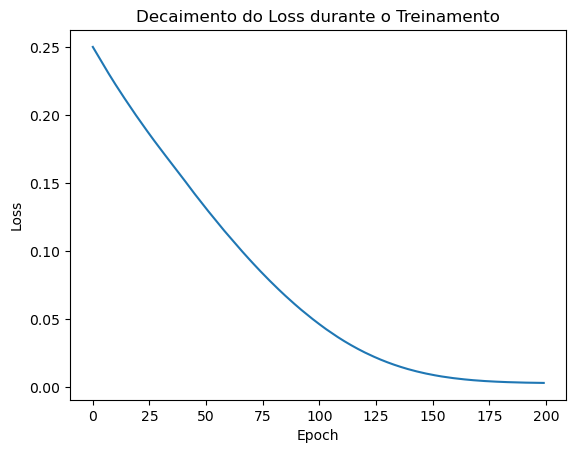

In [9]:
# Plotar o decaimento do loss ao longo das epochs
plt.plot(history.history['loss'])
plt.title('Decaimento do Loss durante o Treinamento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [10]:
loss = model.evaluate(X_test, y_test)
loss

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018  


0.001798537210561335

In [11]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [12]:
predictions

array([[0.502404  ],
       [0.37335584],
       [0.43632305],
       [0.50767463],
       [0.42516914],
       [0.53217965],
       [0.4321925 ],
       [0.40264508],
       [0.45196965],
       [0.5289516 ],
       [0.47998458],
       [0.5126526 ],
       [0.47875246],
       [0.47528484],
       [0.555084  ],
       [0.43318263],
       [0.4799442 ],
       [0.51581186],
       [0.4396232 ],
       [0.47997615],
       [0.39107805],
       [0.60978204],
       [0.4337428 ],
       [0.46776536],
       [0.44228938],
       [0.34142312],
       [0.5087093 ],
       [0.39475372],
       [0.399167  ],
       [0.39775032],
       [0.51227444],
       [0.35150912],
       [0.5746917 ],
       [0.3904588 ],
       [0.46297055],
       [0.48769173]], dtype=float32)

In [13]:
y_pred = pd.DataFrame(predictions)
y_test = pd.DataFrame(y_test)

In [14]:
y_pred.index = y_test.index

In [15]:
df_combined = pd.concat([y_pred,y_test], axis=1)
df_combined.columns = ['y_pred', 'y_test']

In [16]:
df_combined['dif'] = (df_combined['y_pred'] - df_combined['y_test'])*100

In [17]:
mse = mean_squared_error(df_combined['y_pred']*100, df_combined['y_test']*100)

print("Mean Squared Error (MSE) da coluna 'diferenca':", mse)

Mean Squared Error (MSE) da coluna 'diferenca': 17.985372142758184


In [18]:
df_combined

,y_pred,y_test,dif
115,0.502404,0.476,2.640397
73,0.373356,0.400,-2.664416
122,0.436323,0.432,0.432305
50,0.507675,0.588,-8.032537
149,0.425169,0.408,1.716914
33,0.532180,0.648,-11.582035
165,0.432193,0.508,-7.580750
172,0.402645,0.368,3.464508
133,0.451970,0.444,0.796965
31,0.528952,0.608,-7.904841


In [19]:
model.save('Modelo_Energia_RNA_NoRegen.keras')